# 2 Model Train
- 使用CV方法做训练

In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "data_add.json"

def load_data(data_path):
    """Loads training dataset from json file
    
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    
    """
    with open(data_path, "r") as fp:
        data = json.load(fp)
        
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

def prepare_datasets(test_size, validation_size):
    
    # load data
    X, y = load_data(DATA_PATH)
    
    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    
    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = validation_size)
    
    return (X_train, X_validation, X_test, y_train, y_validation, y_test)

def build_model(input_shape):
    """
    Generates RNN-LSTM model
    
    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """
    
    # create model
    model = keras.Sequential()
    
    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape = input_shape, return_sequences = True))
    model.add(keras.layers.LSTM(64))
    
    # dense layers
    model.add(keras.layers.Dense(64, activation = 'relu'))
    model.add(keras.layers.Dropout(0.3))
    
    # output layer
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    
    return model
    
    
def plot_history(history):
    
    fig, axs = plt.subplots(2)
    
    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label = "train accuracy")
    axs[0].plot(history.history["val_accuracy"], label = "test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc = "lower right")
    axs[0].set_title("Accuracy eval")
    
    # create accuracy subplot
    axs[1].plot(history.history["loss"], label = "train error")
    axs[1].plot(history.history["val_loss"], label = "test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc = "upper right")
    axs[1].set_title("Error eval")
    
    plt.show()
    
def predict(model, X, y):
    
    X = X[np.newaxis, ...]
    
    # prediction = [ [0.1, 0.2, ...]]
    prediction = model.predict(X) # X -> (1, 130, 13, 1)
    
    # extract index with max value
    predicted_index = np.argmax(prediction, axis = 1) #[4]
    print("Expected index: {}, Predicted index: {}".format(y,  predicted_index))

2024-11-21 11:15:08.039221: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-21 11:15:08.101825: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-21 11:15:08.102356: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-21 11:15:08.104976: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 259, 64)           19968     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2024-11-21 11:15:13.223533: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8101
2024-11-21 11:15:14.899178: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


17/17 [==============================] - 6s 71ms/step - loss: 2.1776 - accuracy: 0.2398 - val_loss: 2.0166 - val_accuracy: 0.7923
Epoch 2/100
17/17 [==============================] - 1s 44ms/step - loss: 1.9205 - accuracy: 0.7060 - val_loss: 1.7672 - val_accuracy: 0.8769
Epoch 3/100
17/17 [==============================] - 1s 45ms/step - loss: 1.6686 - accuracy: 0.8665 - val_loss: 1.5120 - val_accuracy: 0.8846
Epoch 4/100
17/17 [==============================] - 1s 46ms/step - loss: 1.3859 - accuracy: 0.8897 - val_loss: 1.2428 - val_accuracy: 0.8846
Epoch 5/100
17/17 [==============================] - 1s 44ms/step - loss: 1.1315 - accuracy: 0.9052 - val_loss: 0.9828 - val_accuracy: 0.8846
Epoch 6/100
17/17 [==============================] - 1s 45ms/step - loss: 0.8750 - accuracy: 0.9033 - val_loss: 0.7558 - val_accuracy: 0.8846
Epoch 7/100
17/17 [==============================] - 1s 44ms/step - loss: 0.6895 - accuracy: 0.9033 - val_loss: 0.5956 - val_accuracy: 0.8846
Epoch 8/100
17/17 

17/17 [==============================] - 1s 43ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 59/100
17/17 [==============================] - 1s 49ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 60/100
17/17 [==============================] - 1s 46ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 61/100
17/17 [==============================] - 1s 46ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 62/100
17/17 [==============================] - 1s 52ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 63/100
17/17 [==============================] - 1s 48ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 64/100
17/17 [==============================] - 1s 45ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 65/100

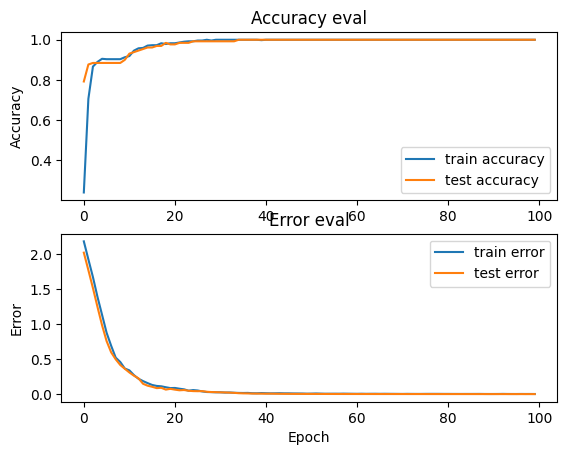

In [2]:
if __name__ == "__main__":
    
    # create train, validation and test sets
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)
    
    # build the CNN net
    input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
    model = build_model(input_shape)
    
    # compile the network
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
    model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])
    model.summary()
    
    # train the RNN-LSTM
    history = model.fit(X_train, y_train, validation_data = (X_validation, y_validation), batch_size = 32, epochs = 100)
    
    # evaluate the RNN-LSTM on the test set
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose = 1)
    print("Accuracy on test set is: {}".format(test_accuracy))
    
    # make prediction on a sample
    X = X_test[100]
    y = y_test[100]

    predict(model, X, y)
    
    # plot accuracy and error over the epochs
    plot_history(history)